In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

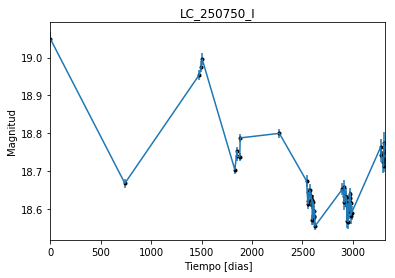

In [3]:
data = np.genfromtxt('LC_250750_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_250750_I')
plt.savefig("LC_250750_I.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

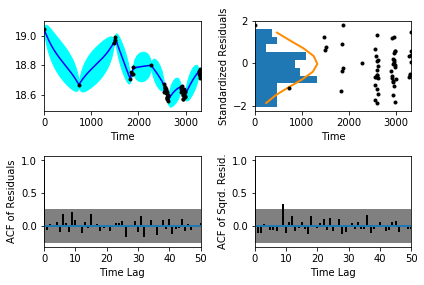

In [6]:
sample.assess_fit()

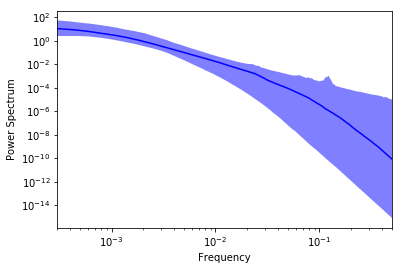

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

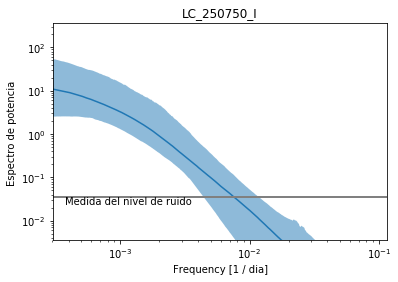

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_250750_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_250750_I')

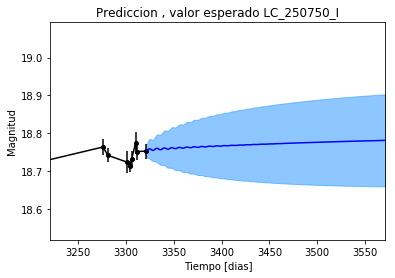

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_250750_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_250750_I')

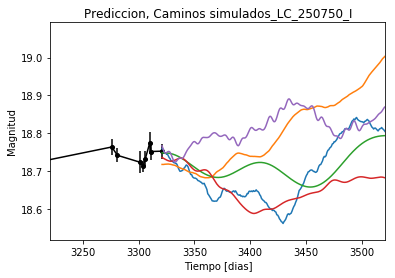

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_250750_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


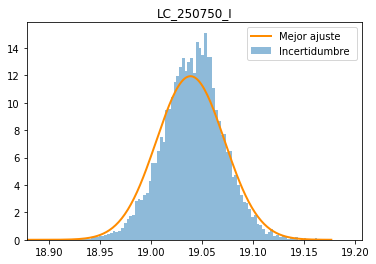

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_250750_I')
plt.savefig("Mejor_ajuste_LC_250750_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_250750_I')

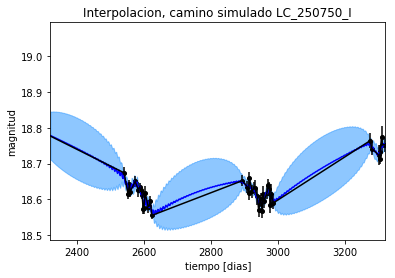

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_I')

Text(0.5,1,'Interpolacion, camino simulado LC_250750_I')

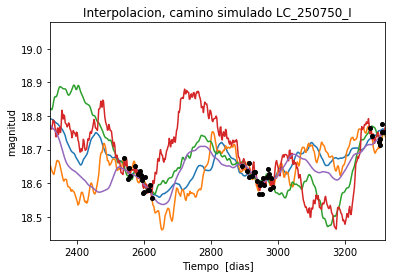

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 425.191045474
Median: 0.0147271577518
Standard deviation: 0.202674939274
68% credibility interval: [ 0.0010753   0.20555213]
95% credibility interval: [  3.52084569e-04   8.22316556e-01]
99% credibility interval: [  3.15098184e-04   9.45629755e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 493.643370319
Median: 0.00371207573818
Standard deviation: 0.12707945997
68% credibility interval: [ 0.00054342  0.06906802]
95% credibility interval: [  3.24043598e-04   4.52410156e-01]
99% credibility interval: [  3.06790577e-04   9.06251386e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 451.078548965
Median: 0.0223557119647
S

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 429.960391742
Median: 131.888559835
Standard deviation: 2.10132271024
68% credibility interval: [ 129.72963612  133.70161477]
95% credibility interval: [ 127.09833127  135.42226908]
99% credibility interval: [ 124.76453624  136.53615059]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 416.788623537
Median: 0.5381400064
Standard deviation: 2.73530233565
68% credibility interval: [ 0.05260246  4.59685024]
95% credibility interval: [ 0.0181686   8.61187157]
99% credibility interval: [  1.26116242e-02   1.35758600e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 270.870345323
Median: 0.80772454528
Standard deviation: 13.1171365746
68% credibility interval: [  0.05032622  13.06554409]
95% credibility interval: [  1.02

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19992.9199724
Median: 3.75179704831e-53
Standard deviation: 1.3113339462e+82
68% credibility interval: [  3.81557523e-90   3.34998954e-10]
95% credibility interval: [  3.45783861e-121   2.06509036e+002]
99% credibility interval: [  2.57148591e-131   6.57305370e+036]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1730.33873044
Median: 18.7865138297
Standard deviation: 0.0785888732595
68% credibility interval: [ 18.72099698  18.8609243 ]
95% credibility interval: [ 18.6435616   18.95010653]
99% credibility interval: [ 18.55867076  19.03971894]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 290.955570052
Median: 0.0663030250989
Standard deviation: 0.247431141965
68% credibility interval: [ 0.          0.45048914]
95% credibility interval: [ 0.          0.88478678]
99% credibility interval: [ 0.          0.96313749]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 290.955570052
Median: 0.0663030250989
Standard deviation: 0.247431141965
68% credibility interval: [ 0.          0.45048914]
95% credibility interval: [ 0.          0.88478678]
99% credibility interval: [ 0.          0.96313749]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 863.052139924
Median: 0.0
Standard deviation: 0.000469422497924
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 429.960391742
Median: 131.888559835
Standard deviation: 2.10132271024
68% credibility interval: [ 129.72963612  133.70161477]
95% credibility interval: [ 127.09833127  135.42226908]
99% credibility interval: [ 124.76453624  136.53615059]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1190.17701227
Median: 0.0240061101028
Standard deviation: 0.0312337579344
68% credibility interval: [ 0.01524887  0.04272132]
95% credibility interval: [ 0.01018274  0.09445048]
99% credibility interval: [ 0.00813694  0.20464684]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 539.580537205
Median: 1.13582456621
Standard deviation: 0.233006056761
68% credibility interval: [ 0.92237071  1.39433582]
95% credibility interval: [ 0.758265    1.65620101]
99% credibility interval: [ 0.67377311  1.8464347 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 211.044966423
Median: 0.000707565154714
Standard deviation: 0.261584635232
68% credibility interval: [  1.29947377e-05   2.73449590e-02]
95% credibility interval: [  6.57438876e-08   5.47660927e-01]
99% credibility interval: [  8.45866897e-40   2.08449895e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 425.191045474
Median: (-0.0925334612026-1.82485855492j)
Standard deviation: 2.00963044524
68% credibility interval: [-1.29152213-5.43176561j -0.00675631-0.51159974j]
95% credibility interval: [ -5.16676730e+00+0.j          -2.21221259e-03-2.17221816j]
99% credibility interval: [ -5.94156698e+00+0.j          -1.97982028e-03-0.12853147j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 493.643370319
Median: (-0.0233236597373+2.25483097778j)
Standard deviation: 1.74771245563
68% credibility interval: [-0.43396717+0.3211858j  -0.00341440+0.00908689j]
95% credibility interval: [ -2.84257684e+00+3.61766107j  -2.03602597e-03+0.j        ]
99% credibility interval: [ -5.69414539e+00+3.73965939j  -1.92762204e-03+0.01474694j]
Post